In [1]:
#Librerias usadas
import numpy as np #Manejo de arreglos
import matplotlib.pyplot as plt #Dibujar las matrices
import tensorflow as tf #Redes neuronales
import cv2 #Manejo de imagenes
import keras #Estructura de redes neuronales
import math #Funciones matematicas
import os#Creacion de directorios(operating system)
import pickle #manejar archivos y listas
from time import time #Tiempo de ejecucion

In [2]:
#Creacion de directorios
folder='Mayusculas 127D'
user='Monroy969'
folderpreprocesado='LetrasPreprocesadasMayusculas'
listo=0
if os.path.isdir('C:/Users/'+user+'/Desktop/'+folder+'/'+folderpreprocesado+'/'):
    print('La carpeta 1 existe.');
    for numero_hojas in range(1,49):
        if os.path.isdir('C:/Users/'+user+'/Desktop/'+folder+'/'+folderpreprocesado+'/Hoja'+str(numero_hojas)):
            listo=1
        else:
            os.mkdir('C:/Users/'+user+'/Desktop/'+folder+'/'+folderpreprocesado+'/Hoja'+str(numero_hojas))    
else:
    os.mkdir('C:/Users/'+user+'/Desktop/'+folder+'/'+folderpreprocesado+'/')
    
    
#Cargamos diccionario
diccionario = [] 
a=open('C:/Users/'+user+'/Desktop/'+folder+'/Diccionario/ListaPalabrasEsp_Sorted-2.txt', 'r', encoding='utf-8')

for linea in a:
    diccionario.append(linea)#Se leen las palabras
a.close

#Quitamos los escapes de linea
for x in range(len(diccionario)):
    diccionario[x]=diccionario[x].replace("\n","")

#Determinamos el tamaño del diccionario 
lendcn=len(diccionario) #Determinamos el tamaño del diccionario
exp=0

#Se calcula la diferencia para qe el tamaño del diccionaro sea en potencias de 2(busqueda log)
while(lendcn): 
    lendcn>>=1
    exp+=1
diferencia=2**exp-len(diccionario)

#Preprocesado del diccionario
for x in range(diferencia): #Rellenamos el diccionario con la palabra zzz para completar las potencias
    diccionario.append('zzz')#las zzz ayudan a que no haya ruido
    
#Funcion de busqueda logaritmica
def logs(palabra):
    resultados='' #Listas que gurda si la palabra se encuentra o no
    find=True
    for p in range(1): #Este for evalua cada palabra en la lista
        palabra=palabra #En cada ciclo se evalua una palabra
        listsize = len(diccionario)/2 #Se parte a la mitad el tamaño del diccionario
        pos = listsize #Se guarda la "posicion" de la palabra
        iteraciones=0
        
        while(int(listsize)): #El while se ejecuta mienrtas queden palabras por buscar en el diccionario
            if palabra > diccionario[int(pos)]: #Determina si se buscara de la mitad para arriba
                pos+=listsize/2
            if palabra<diccionario[int(pos)]:#Determina si se buscara de la mitad para abajo
                pos-=listsize/2
            listsize/=2  #Se reduce el diccionario a la mitad
            iteraciones+=1

        if palabra == diccionario[int(pos)]: #Si la palabra es igual a una del diccionario segun la busqueda 
            resultados=resultados+palabra#Se guarda el resultado y se presenta
            find=True
    #Si no se encuentra la palabra se manda un texto.
    if resultados=='':
        resultados=resultados+'No se encontro palabra'
        find=False
    return resultados,find,

#Definimos el tamaño de las imagenes
Alto=28
Ancho=28

#Definimos la oracion
oracion=['b','e','n','j','a','m','i','n','p','i','d','i','o','u','n','a','b','e','b','i','d','a','d','e','k','i','w','i','y','f','r','e','s','a','s','n','o','e','s','i','n','v','e','r','g','u','e','n','z','a','l','a','m','a','s','e','x','q','u','i','s','i','t','a','c','o','s','e','c','h','a']
#Definimos las clases
clases = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
#Definimos las palabras
palabras_validacion=['benjamin','pidio','una','bebida','de','kiwi','y','fresas','noe','sin','verguenza','la','mas','exquisita','cosecha']

#Rango de rojo HSV
rojoBajo1 = np.array([0, 130, 90], np.uint8)
rojoAlto1 = np.array([8, 255, 255], np.uint8)
rojoBajo2 = np.array([160, 140, 90], np.uint8)
rojoAlto2 = np.array([180, 255, 255], np.uint8)

#Activar 1 vez
#Cargamos el modelo preentrenado en googlecolab
model=keras.models.load_model('C:/Users/'+user+'/Desktop/'+folder+'/Modelos/emnist_cnn_model9638.h5')

La carpeta 1 existe.


In [3]:
def calidad_imagen(image):
    num=0
    div=image.shape[0]*image.shape[1]
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            num=num+image[y][x]
    porcentaje=(num/div)*100
    porcentaje=porcentaje/255
    return porcentaje

def guardar_imagen(image,hoja,i):
    cv2.imwrite('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Letra'+str(i+1)+'.jpg',image)

def quitar_imagenes_blanco(imagenes):
    contador=0
    for i in range(len(imagenes)):
        if calidad_imagen(imagenes[i]) != 0:
            guardar_imagen(imagenes[i],47,contador)
            contador+=1

def recortar_borde(imagen):
    I=[]
    for im in range(len(imagen)):
        i=0
        i1=0
        i2=0
        i3=0
        i4=0
        while i!=4:
            #Recortando el margen superior
            bandera=0
            for x in range(imagen.shape[1]):
                if imagen[0][x]==0:
                    bandera=1
                if imagen[0][x]!=0:
                    bandera=0
                    i1=1
                    break
            if bandera==1:
                imagen=imagen[1:imagen.shape[0],0:imagen.shape[1]]

            #Recortando margen inferior
            bandera=0
            for x in range(imagen.shape[1]):
                if imagen[-1][x]==0:
                    bandera=1
                if imagen[-1][x]!=0:
                    bandera=0
                    i2=1
                    break
            if bandera==1:
                imagen=imagen[0:imagen.shape[0]-1,0:imagen.shape[1]]

            #Recortando margen izquierdo
            bandera=0
            for y in range(imagen.shape[0]):
                if imagen[y][0]==0:
                    bandera=1
                if imagen[y][0]!=0:
                    bandera=0
                    i3=1
                    break
            if bandera==1:
                imagen=imagen[0:imagen.shape[0],1:imagen.shape[1]]

            #Recortando margen derecho
            bandera=0
            for y in range(imagen.shape[0]-1,0,-1):
                if imagen[y][-1]==0:
                    bandera=1
                if imagen[y][-1]!=0:
                    bandera=0
                    i4=1
                    break

            if bandera==1:
                imagen=imagen[0:imagen.shape[0],0:imagen.shape[1]-1]

            i=i1+i2+i3+i4

    return imagen

def borderstoblack(image,padding):
    image=image[padding:image.shape[0]-padding,padding:image.shape[0]-padding]
    return image

def nxn(imagen):
    ref=0
    if imagen.shape[0]>imagen.shape[1]:
        ref=imagen.shape[0]
        
    if imagen.shape[0]<imagen.shape[1]:
        ref=imagen.shape[1]
        
    if imagen.shape[0]==imagen.shape[1]:
        return imagen

    borde_superior=math.ceil(abs(ref-imagen.shape[0])/2)
    borde_inferior=math.floor(abs(ref-imagen.shape[0])/2)
    borde_izquierdo=math.ceil(abs(ref-imagen.shape[1])/2)
    borde_derecho=math.floor(abs(ref-imagen.shape[1])/2)
    imagen=cv2.copyMakeBorder(imagen,borde_superior,borde_inferior,borde_izquierdo,borde_derecho,cv2.BORDER_CONSTANT,value=0)
    return imagen

In [4]:
#Funciones para procesar las palabras
global il
il=[(1,9),(9,14),(14,17),(17,23),(23,25),(25,29),(29,30),(30,36),(36,39),(39,42),(42,51),(51,53),(53,56),(56,65),(65,72)]#Indices de inicio y fin de cada palabra

def inicializa_arreglos(arreglo):
    Nuevo_arreglo=[]
    for x in range(len(arreglo)):
        Nuevo_arreglo.append(0)
    for x in range(len(arreglo)):
        Nuevo_arreglo[x]=arreglo[x]
    return Nuevo_arreglo
        
    
#Construccion de palabras con la mayor exactitud de letras detectada
def construccion1(hoja):
    global palabras
    palabras=[] 
    deep=0
    hoja=hojas
    for numero_palabra in range(len(il)):
        palabra=""
        for numero_letra in range(il[numero_palabra][0],il[numero_palabra][1]):
            with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p',"rb") as f:
                    obj=pickle.load(f)
                    palabra=palabra+obj[deep][1]
        palabras.append(palabra)
    return palabras

def contabilizacion_palabras_con_errores(palabras):
    #Contabilizacion de palabras con errores
    errores=0
    Errores=[]
    palabras_diferentes=0
    Palabras_diferentes=[] 
    palabras_correctas=0
    Palabras_correctas=[]
    
    for x in range(len(palabras)):
        palabra,aciertos=logs(palabras[x])
        if aciertos==False:
            Errores.append(x)
            errores+=1
            
        if aciertos==True and palabra!=palabras_validacion[x]:
            Palabras_diferentes.append(x)
            palabras_diferentes+=1

        if aciertos==True and palabra==palabras_validacion[x]:
            Palabras_correctas.append(x)
            palabras_correctas+=1
            
    return Errores,errores,Palabras_diferentes,palabras_diferentes,Palabras_correctas,palabras_correctas

def contabilizacion_errores_en_palabras(Errores,palabras):
    #Contabilizacion de errores
    Errores1=[]
    Errores2=[]
    Errores3=[]
    Erroresxpalabra=[]
    LD=[]
    #Contabilizacion de errores por palabra
    for e in range(len(Errores)):
        erroresxpalabra=0
        #print(palabras[Errores[e]])
        contador=0
        for x in range(il[Errores[e]][0]-1,il[Errores[e]][1]-1):

            if oracion[x]!=palabras[Errores[e]][contador]:
                #print(oracion[x],palabras[Errores[e]][contador])
                args=((oracion[x],palabras[Errores[e]][contador]),Errores[e])
                LD.append(args)
                erroresxpalabra+=1

            contador+=1
        #print('la ',Errores[e],'palabra tiene: ',erroresxpalabra,'errores')
        EP=Errores[e],erroresxpalabra
        Erroresxpalabra.append(EP)

        if erroresxpalabra==1:
            Errores1.append(Errores[e])
        if erroresxpalabra==2:
            Errores2.append(Errores[e])
        if erroresxpalabra>2:
            Errores3.append(Errores[e])
            
    return Erroresxpalabra,LD,Errores1,Errores2,Errores3

def correccion1(Errores,hoja,palabras):
    lista_corregida=palabras
    palabras_corregidas=[]
    #Correccion si es un error
    for numero_palabra in range(len(Errores)):
        bandera=False
        aciertos=False
        if aciertos==False:#Si hay errores entra
            iteracion=0 #Empieza con 1 en la correccion de errores (Deep[0]->mayor exactitud-Deep[25]->menor exactitud)
            deep=0 #Nivel de correccion demas letras
            deepc=0 #Nivel de correcion la letra seleccionada
            while iteracion!=26: #Evaluamos los 26 niveles de correcion (0-25)
                for l in range(il[Errores[numero_palabra]][0],il[Errores[numero_palabra]][1]):#Letra a corregir
                    palabra1=""#Limpia la palabra
                    for numero_letra in range(il[Errores[numero_palabra]][0],il[Errores[numero_palabra]][1]):#Letra a construir 
                        with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p',"rb") as f:
                            obj=pickle.load(f) #obj es un arreglo con dos partes obj[orden de exactitud][letras o valor numérico]
                            if numero_letra==l: #Si letra a construir corresponde al numero de letra corregir esta se cambiara dependiendo de la profundidad de la exactitud
                                deepc=iteracion #La profundidad de la exactitud va aumentando conforme no se reconoce la palabra
                                palabra1=palabra1+obj[deepc][1] #Se construye la palabra obteniendo la letra con diferente exactitud
                            else: #En caso de que no corresponda la letra a contruir con la letra a corregir, se toma la letra con mayor exactitud
                                deep=0 #Mayor maximo de exactiutd
                                palabra1=palabra1+obj[deep][1] #Construccion de la palabra con la letra con mayor exactitud en esa posicion
                    resultado,aciertos=logs(palabra1) #Se evalua con la busqueda logaritmica en el diccionario
                    if aciertos==True and resultado==palabras_validacion[Errores[numero_palabra]]:
                        p=resultado,Errores[numero_palabra]
                        palabras_corregidas.append(p)
                        bandera=True
                        break
                    if aciertos==True and resultado!=palabras_validacion[Errores[numero_palabra]]:
                        p=resultado,Errores[numero_palabra]
                        palabras_corregidas.append(p)
                        bandera=True
                        break
                if bandera==True: #Salir del ciclo
                    break
                iteracion+=1 #Aumenta la profundidad cada vez que no se encuentra la palabra
    print(palabras_corregidas)
    for x in range(len(Errores)):
        lista_corregida[palabras_corregidas[x][1]]=palabras_corregidas[x][0]

    return lista_corregida

def correccion_palabra_2_errores(Errores,hoja,palabras,e):  
    if Errores!=[]:
        lista_corregida=palabras
        palabras_corregidas=[]
        palabra=il[Errores[e]]
        salida=False
        for p1 in range(palabra[1]-palabra[0]):
            if salida==True:
                break
            for deep1 in range(26):
                if salida==True:
                    break
                for p2 in range(p1+1,palabra[1]-palabra[0]):
                    if salida==True:
                        break
                    for deep2 in range(26):
                        construccion=""
                        barridoletra=0
                        for numero_letra in range(palabra[0],palabra[1]):
                            bandera=0
                            #print(barridoletra,p1,p2)
                            with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p',"rb") as f:
                                obj=pickle.load(f)

                                if barridoletra==p1:
                                    construccion=construccion+obj[deep1][1]
                                    bandera=1

                                if barridoletra==p2:
                                    construccion=construccion+obj[deep2][1]

                                    bandera=1

                                if bandera!=1:
                                    deep=0
                                    construccion=construccion+obj[deep][1]
                            barridoletra+=1

                        resultado,estado=logs(construccion)
                        #print(construccion)
                        if estado == True:
                            p=resultado,Errores[e]
                            palabras_corregidas.append(p)
                            salida=True
                            #print(resultado)
                            break           
        for np in range(len(palabras_corregidas)):
            lista_corregida[palabras_corregidas[np][1]]=palabras_corregidas[np][0]

        return lista_corregida
    else:
        return lista_corregida

def correccion_2_errores(Errores,hojas,palabras):
    if Errores != []:
        for e in range(len(Errores)):
            l=correccion_palabra_2_errores(e22aux,hojas,paux1,e)
        return(l)
    else:
        return palabras

    
def promedio(arreglo):
    promedio=0
    for x in range(len(arreglo)):
        promedio+=arreglo[x]
    promedio=promedio/len(arreglo)
    return promedio


def calculo_de_deltas(Errores,deep,e,hoja):
    deltas=[]
    #Extraccion de predicciones
    palabra=il[Errores[e]]
    datos=[]
    for numero_letra in range(palabra[0],palabra[1]):
        o=[]
        with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p',"rb") as f:
                obj=pickle.load(f) #obj es un arreglo con dos partes obj[orden de exactitud][letras o valor numérico]  

        #Paquete de predicciones
        for x in range(deep):
            o.append(obj[x])
        datos.append(o)

    #Ordenamiento de las deltas de menor a mayor
    deltas=[]
    salida=False
    x=deep-1
    while salida != True:
        for letras in range(len(datos)):
            #print(datos[letras][x-1],datos[letras][x])
            #print(abs(datos[letras][x-1][0]-datos[letras][x][0]),datos[letras][x][1])
            deltas.append(((abs(datos[letras][x-1][0]-datos[letras][x][0]),datos[letras][x][1]),letras))

        salida=True

    deltas.sort()
    #print(deltas)
    #print("")

    return(deltas)

def construccion_palabras_delta(Errores,deep,e,palabras,hoja):
    lista_corregida=palabras
    palabras_corregidas=[]
    deltas=calculo_de_deltas(Errores,deep,e,hoja)
    palabra=il[Errores[e]]

    for posibilidad in range(len(deltas)):
        construccion=""
        i=0
        for numero_letra in range(palabra[0],palabra[1]):
            #print(i,deltas[posibilidad][1])
            if i==deltas[posibilidad][1]:
                with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+
                          '/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p',"rb") as f:
                        obj=pickle.load(f) #obj es un arreglo con dos partes 
                                            #obj[orden de exactitud][letras o valor numérico]
                
                construccion= construccion+obj[deep-1][1]

            else:
                with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+
                          '/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p',"rb") as f:
                        obj=pickle.load(f) #obj es un arreglo con dos partes 
                                            #obj[orden de exactitud][letras o valor numérico]
                
                construccion= construccion+obj[0][1]
            i+=1

        l,estado=logs(construccion)
        if estado==True:           
            p=l,Errores[e]
            palabras_corregidas.append(p)
            bandera=True
            break
            
    for np in range(len(palabras_corregidas)):
        lista_corregida[palabras_corregidas[np][1]]=palabras_corregidas[np][0]

    return lista_corregida,estado

def correccion_delta(e11aux,paux1,hoja):
    if e11aux!=[]:
        for palabra in range(len(e11aux)):
            deep=2
            iteraciones=0
            estado=False
            while estado==False or iteraciones==26:
                l,estado=construccion_palabras_delta(e11aux,deep,palabra,paux1,hoja) #Errores,Deep,letra,palabras
                iteraciones+=1
                deep+=1
        return l
    else:
        return paux1

In [26]:
calculo_de_deltas(e11aux,2,1,1)

[((0.63863987, 'o'), 2),
 ((0.9970565, 'j'), 1),
 ((0.99762404, 'e'), 0),
 ((0.99945796, 'c'), 4),
 ((0.99999166, 'j'), 3)]

In [5]:
#Numero de hojas por evaluar
Tipo_letras='Mayusculas'
if Tipo_letras=='Mayusculas':
    itrs=46

hoja numero 1
(1600, 1175)
(1600, 1175)
hoja numero 2
(1600, 1175)
(1600, 1175)
hoja numero 3
(1600, 1175)
(1600, 1175)
hoja numero 4
(1600, 1175)
(1600, 1175)
hoja numero 5
(1600, 1175)
(1600, 1175)
hoja numero 6
(1600, 1175)
(1600, 1175)
hoja numero 7
(1600, 1175)
(1600, 1175)
hoja numero 8
(1600, 1175)
(1600, 1175)
hoja numero 9
(1600, 1175)
(1600, 1175)
hoja numero 10
(1600, 1175)
(1600, 1175)
hoja numero 11
(1600, 1175)
(1600, 1175)
hoja numero 12
(1600, 1175)
(1600, 1175)
hoja numero 13
(1600, 1175)
(1600, 1175)
hoja numero 14
(1600, 1175)
(1600, 1175)
hoja numero 15
(1600, 1175)
(1600, 1175)
hoja numero 16
(1600, 1175)
(1600, 1175)
hoja numero 17
(1600, 1175)
(1600, 1175)
hoja numero 18
(1600, 1175)
(1600, 1175)
hoja numero 19
(1600, 1175)
(1600, 1175)
hoja numero 20
(1600, 1175)
(1600, 1175)
hoja numero 21
(1600, 1175)
(1600, 1175)
hoja numero 22
(1600, 1175)
(1600, 1175)
hoja numero 23
(1600, 1175)
(1600, 1175)
hoja numero 24
(1600, 1175)
(1600, 1175)
hoja numero 25
(1600, 117

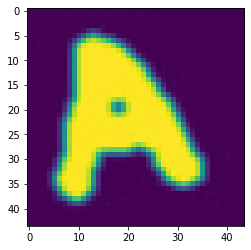

In [16]:
#Cargamos las imagenes a 'color' y 'blanco y negro'
for t in range(1,itrs+1):
    etiqueta=t
    print('hoja numero '+ str(etiqueta))
    raw_bw = cv2.imread('C:/Users/'+user+'/Desktop/'+folder+'/'+Tipo_letras+'/'+str(etiqueta)+'.jpg', cv2.IMREAD_GRAYSCALE)
    raw_color = cv2.imread('C:/Users/'+user+'/Desktop/'+folder+'/'+Tipo_letras+'/'+str(etiqueta)+'.jpg')

    #Convertimos la imagen a formato HSV para manipular los colores
    imageHSV = cv2.cvtColor(raw_color, cv2.COLOR_BGR2HSV)

    # Detectamos el color rojo(creamos filtros para los rojos)
    maskRojo1 = cv2.inRange(imageHSV, rojoBajo1, rojoAlto1)
    maskRojo2 = cv2.inRange(imageHSV, rojoBajo2, rojoAlto2)
    mask = cv2.add(maskRojo1,maskRojo2)

    #BLurr para eliminar ruido
    imagen_bw =  cv2.GaussianBlur(raw_bw,(3,3),0)
    imagen_color = cv2.GaussianBlur(mask, (3,3),0)

    #Obtenemos la imagen con un umbral de 200 a 255 donde 0 es blanco y 255 es negro pues hicimos una inversion de colores.
    (T,threshInv_bw) = cv2.threshold(imagen_bw,245, 255,cv2.THRESH_BINARY_INV)
    (T,threshInv_color) = cv2.threshold(imagen_color,127, 255,cv2.THRESH_BINARY)
    
    threshInv_color = cv2.GaussianBlur(threshInv_color, (3,3),0)

    #Normalizamos la imagen
    threshInv_bwn=threshInv_bw/255

    #Determinamos las medidas de la hoja para poder recortar sobre un margen
    y=threshInv_bwn.shape[0] #alto
    x=threshInv_bwn.shape[1] #ancho
    margenx=50

    #Recortamos los margenes de la imagen 
    imagen_preprocesada_bw=threshInv_bwn[0+50:y,0+margenx:x-margenx]
    imagen_preprocesada_color=threshInv_color[0+50:y,0+margenx:x-margenx]

    #Se obtienen las dimensiones de nuevo
    y=imagen_preprocesada_bw.shape[0]
    x=imagen_preprocesada_bw.shape[1]


    #Conincidencia de tamaños 
    print(imagen_preprocesada_bw.shape)
    print(imagen_preprocesada_color.shape)

    continuar=True
    iteracion=0
    angulo=0
    vel=.01
    centro=(0,0)
    while continuar:   
        M = cv2.getRotationMatrix2D(centro,angulo,1) #-.16
        imagen_rotada = cv2.warpAffine(imagen_preprocesada_bw,M,(x,y))

        #Fragementamos la imagen para tardar menos en leer
        y=imagen_rotada.shape[0]#Maximo de la hoja y
        x=imagen_rotada.shape[1]#Maximo de la hoja x

        #Primera escuadra
        y1=int(y/4)#Posicion final de el primer recorte y
        x1=int(x/4)-90#Posicion final de el primer recorte x

        #Segunda escuadra
        y2=int(y/4)
        x2=int(x*3/4)

        #Tercera escuadra
        y3=int(y*(3/4))
        x3=int(x/4)

        #Cuarta escuadra
        y4=int(y*(3/4))
        x4=int(x*3/4)

        #Recortamos la imagen en la parte superior y la inferior
        imagen_recortada_1=imagen_rotada[0:y1,0:x1]
        imagen_recortada_2=imagen_rotada[0:y2,x2:x]
        imagen_recortada_3=imagen_rotada[y3:y,0:x3]
        imagen_recortada_4=imagen_rotada[y4:y,x4:x]


        #Determinamos los centros de las escuadras
        #Escuadra superior izquierda
        bandera=0
        nstp=0
        for r in range(imagen_recortada_1.shape[0]):
            for c in range(imagen_recortada_1.shape[1]):
                if imagen_recortada_1[r][c]!=0:
                    nstp=1
                    if nstp==1: 
                        pos1=r,c
                        bandera=1
                if bandera==1:
                    break
            if bandera==1:
                break

        #Escuadra superiror derecha
        bandera=0
        for r in range(imagen_recortada_2.shape[0]):
            for c in range(imagen_recortada_2.shape[1]-1,0,-1):
                if imagen_recortada_2[r][c]!=0:
                    pos2=r,c+x2
                    bandera=1
                if bandera==1:
                    break
            if bandera==1:
                break

        #Escuadra inferior izquierda
        bandera=0
        for r in range(imagen_recortada_3.shape[0]-1,0,-1):
            for c in range(imagen_recortada_3.shape[1]):
                if imagen_recortada_3[r][c]!=0:
                    pos3=r+y3,c
                    bandera=1
                if bandera==1:
                    break
            if bandera==1:
                break

        #Escuadra inferior derecha
        bandera=0
        for r in range(imagen_recortada_4.shape[0]-1,0,-1):
            for c in range(imagen_recortada_4.shape[1]-1,0,-1):
                if imagen_recortada_4[r][c]!=0:
                    pos4=r+y4,c+x4
                    bandera=1
                if bandera==1:
                    break
            if bandera==1:
                break

        #Si cambiamos el angulo a un angulo v por iteracion hasta llegar a una diferencia de puntos <=1

        if pos1[0]<pos2[0]:
            angulo=angulo+vel

        if pos1[0]>pos2[0]:
            angulo=angulo-vel

        if iteracion==50:
            break
        iteracion+=1
        centro=pos1


    #Se aplica el mejor angulo bw
    M = cv2.getRotationMatrix2D(centro,angulo,1) #-.16
    imagen_rotada = cv2.warpAffine(imagen_preprocesada_bw,M,(x,y))

    #Se aplica el mejor angulo color
    M = cv2.getRotationMatrix2D(centro,angulo,1) #-.16
    imagen_rotada_letras = cv2.warpAffine(imagen_preprocesada_color,M,(x,y))


    #Ajuste de margen
    imagen_zero=imagen_rotada_letras[pos1[0]+37:pos4[0]-37,pos1[1]+37:pos2[1]]
    imagen_zero_pruebas=imagen_rotada[pos1[0]+37:pos4[0]-37,pos1[1]+37:pos2[1]]

    plt.imshow(imagen_zero)
    #Coordenadas para recortar
    intervalo=[70,69,68]
    intervalo2=[68,69,70]
    imagenes=[]
    numero_primero=0

    coordenadasy=[]
    coordenadasx=[]

    for y in range(0,15):
        numero_primero_Y=69+y*(69*3)
        numero_segundo_Y=138+y*(69*3)
        coordenadasy.append([numero_primero_Y,numero_segundo_Y])

    for x in range(5):
        for x in range(3):
            numero_segundo=numero_primero+intervalo[x]
            if numero_segundo<968:
                coordenadasx.append([numero_primero,numero_segundo])

                numero_primero=numero_segundo
            else:break
            numero_primero=numero_segundo


        for x in range(3):
            #print(intervalo2[x])
            numero_segundo=numero_primero+intervalo2[x]

            if numero_segundo<968:
                #print(numero_primero,numero_segundo)
                coordenadasx.append([numero_primero,numero_segundo])
                numero_primero=numero_segundo
            else:break
    
   #Generacion de imagenes    
    imagenes=[]
    for y in range(7):
        for x in range(14):
            imagenes.append(imagen_zero[coordenadasy[y][0]:coordenadasy[y][1],coordenadasx[x][0]:coordenadasx[x][1]])
        quitar_imagenes_blanco(imagenes)#47 es la carpeta con archivos temporales

    temps=[]
    for x in range(1,92):
        raw_bw=cv2.imread('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(itrs+1)+'/Letra'+str(x)+'.jpg', cv2.IMREAD_GRAYSCALE)
        temps.append(raw_bw)
    
    for x in range(71):
        r=recortar_borde(temps[x])
        plt.imshow(r)
        if calidad_imagen(r)<25:
            btb=borderstoblack(r,1)
            save=recortar_borde(btb)
            save=nxn(save)

        else: save=nxn(r)
        plt.imshow(save)
        #Resize
        resize=cv2.resize(save, (28,28))
        guardar_imagen(resize,etiqueta,x) 



In [17]:
#Predicciones
for hoja in range(1,itrs+1):
    print(hoja)
    for numero_letra in range(1,72):
        #print(numero_letra)
        letra = cv2.imread('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Letra'+str(numero_letra)+'.jpg', cv2.IMREAD_GRAYSCALE)
        
        #Definimos las dimensiones para la CNN (numero de imagenes,Alto,Ancho,Numero de canales de color)
        Datos_Predict = np.asarray(letra).reshape(-1,Alto,Ancho,1)
        Datos_Predict = Datos_Predict.astype('float32')
        
        #Evaluamos la prediccion
        y_pred = model.predict(Datos_Predict/255)#Evaluamos los datos
        
        #Se asigna la clase a los valores predichos
        letras=[]
        for n in range(len(y_pred)):
            aux=[]
            for j in range(len(y_pred[n])):
                #print(y_pred[n][j],clases[j])
                letras.append([y_pred[n][j],clases[j]]) #Asignacion de letra a cada exactitud
                
         #Ordenacion mayor a menor
        letras.sort(reverse=True)
        #Guardado de informacion
        with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.p', "wb") as f:
             pickle.dump(letras, f)
        
        with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/Prediccion'+str(numero_letra)+'.txt', "w") as f:
              f.write(str(letras)+'\n')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46


In [18]:
for hojas in range(1,itrs+1):#1,itrs+1
    print(hojas)
    resumen=[]#Lista que guardara los datos mas relevantes por cada hoja
    print('la hoja: '+str(hojas)) #Hoja actual
    
    #Construccion de la palabra suponiendo que la mayor exactitud es la correcta
    p1=construccion1(hojas)
    paux1=inicializa_arreglos(p1)
    print(p1)
    
    E,e,Pd,pd,Pc,pc=contabilizacion_palabras_con_errores(paux1)
    
    print('se encontraron '+str(e)+' errores de 15 palabras')
    print('los errores son en las palabras ',E)
    print('')
    print('se encontraron '+str(pd)+' palabras diferentes de 15 palabras')
    print('las palabras diferentes son:',Pd)
    print('')
    print('se encontraron '+str(pc)+' palabras correctas de 15 palabras')
    print('las palabras correctas son:',Pc)
    Pre1=(100*(pc/15))
    print('porcentaje de exactitud',Pre1)
    
    Eaux=inicializa_arreglos(E)
    exp1,LD1,e11,e21,e31=contabilizacion_errores_en_palabras(Eaux,paux1)
    e11aux=inicializa_arreglos(e11)
    
    print('Arreglo de (palabras,numero de errores):')
    print(exp1)
    print(' ')
    print('Arreglo de (letra ideal, letra obtenida,palabra con el error):')
    print(LD1)
    print('')
    print('indice de palabras con 1, 2 y 3 errores:')
    print(e11,e21,e31)
    print('')
    
    p2=correccion_delta(e11aux,paux1,hojas)
    paux2=inicializa_arreglos(p2)
    print(p2)

    E2,e2,Pd2,pd2,Pc2,pc2=contabilizacion_palabras_con_errores(paux2)
    E2aux=inicializa_arreglos(E2)

    
    print('se encontraron '+str(e2)+' errores de 15 palabras')
    print('los errores son en las palabras ',E2)
    print('')
    print('se encontraron '+str(pd2)+' palabras diferentes de 15 palabras')
    print('las palabras diferentes son:',Pd2)
    print('')
    print('se encontraron '+str(pc2)+' palabras correctas de 15 palabras')
    print('las palabras correctas son:',Pc2)
    Pre2=(100*(pc2/15))
    print('porcentaje de exactitud',Pre2)
    
    exp2,LD2,e12,e22,e32=contabilizacion_errores_en_palabras(E2aux,paux2)
    e22aux=inicializa_arreglos(e22)
    
    print('Arreglo de (palabras,numero de errores):')
    print(exp2)
    print(' ')
    print('Arreglo de (letra ideal, letra obtenida,palabra con el error):')
    print(LD2)
    print('')
    print('indice de palabras con 1, 2 y 3 errores:')
    print(e12,e22,e32)
    print('')
    
    p3=correccion_2_errores(e22aux,hojas,paux1)
    paux3=inicializa_arreglos(p3)
    print(p3)

    E3,e3,Pd3,pd3,Pc3,pc3=contabilizacion_palabras_con_errores(paux3)
    E3aux=inicializa_arreglos(E3)

    print('se encontraron '+str(e3)+' errores de 15 palabras')
    print('los errores son en las palabras ',E3)
    print('')
    print('se encontraron '+str(pd3)+' palabras diferentes de 15 palabras')
    print('las palabras diferentes son:',Pd3)
    print('')
    print('se encontraron '+str(pc3)+' palabras correctas de 15 palabras')
    print('las palabras correctas son:',Pc3)
    Pre3=(100*(pc3/15))
    print('porcentaje de exactitud',Pre3)
    
    exp3,LD3,e13,e23,e33=contabilizacion_errores_en_palabras(E3aux,paux3)
    
    print('Arreglo de (palabras,numero de errores):')
    print(exp3)
    print(' ')
    print('Arreglo de (letra ideal, letra obtenida,palabra con el error):')
    print(LD3)
    print('')
    print('indice de palabras con 1, 2 y 3 errores:')
    print(e13,e23,e33)
    print('')
    
    #Guardado
    r=[p1,e,E,pd,Pd,pc,Pc,Pre1,exp1,LD1,e11,e21,e31,p2,e2,E2,pd2,Pd2,pc2,Pc2,Pre2,exp2,LD2,e12,e22,e32,p3,e3,E3,pd3,Pd3,pc3,Pc3,Pre3,exp3,LD3,e13,e23,e33]
    for x in range(len(r)):
        resumen.append(r[x])
    
 
    #Guardado de datos
    with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hojas)+'/resumen.p', "wb") as f:
         pickle.dump(resumen, f)


    with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hojas)+'/resumen.txt', "w") as f:
          f.write(str(resumen)+'\n')
    


1
la hoja: 1
['benjamin', 'pidio', 'una', 'bebioa', 'dg', 'kini', 'y', 'fresas', 'noe', 'sin', 'verquenza', 'la', 'mas', 'gxquisita', 'cosecha']
se encontraron 5 errores de 15 palabras
los errores son en las palabras  [3, 4, 5, 10, 13]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 10 palabras correctas de 15 palabras
las palabras correctas son: [0, 1, 2, 6, 7, 8, 9, 11, 12, 14]
porcentaje de exactitud 66.66666666666666
Arreglo de (palabras,numero de errores):
[(3, 1), (4, 1), (5, 1), (10, 1), (13, 1)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('d', 'o'), 3), (('e', 'g'), 4), (('w', 'n'), 5), (('g', 'q'), 10), (('e', 'g'), 13)]

indice de palabras con 1, 2 y 3 errores:
[3, 4, 5, 10, 13] [] []

['benjamin', 'pidio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encont

['bengamin', 'pioio', 'una', 'ogbioa', 'og', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'sxovisita', 'cosgcha']
se encontraron 6 errores de 15 palabras
los errores son en las palabras  [0, 1, 3, 4, 13, 14]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 9 palabras correctas de 15 palabras
las palabras correctas son: [2, 5, 6, 7, 8, 9, 10, 11, 12]
porcentaje de exactitud 60.0
Arreglo de (palabras,numero de errores):
[(0, 1), (1, 1), (3, 3), (4, 2), (13, 3), (14, 1)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('j', 'g'), 0), (('d', 'o'), 1), (('b', 'o'), 3), (('e', 'g'), 3), (('d', 'o'), 3), (('d', 'o'), 4), (('e', 'g'), 4), (('e', 's'), 13), (('q', 'o'), 13), (('u', 'v'), 13), (('e', 'g'), 14)]

indice de palabras con 1, 2 y 3 errores:
[0, 1, 14] [4] [3, 13]

['benjamin', 'pidio', 'una', 'ogbioa', 'og', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'sxovisita', 'cosecha']
se

['benjamin', 'pidio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'ele', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encontraron 1 palabras diferentes de 15 palabras
las palabras diferentes son: [9]

se encontraron 14 palabras correctas de 15 palabras
las palabras correctas son: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14]
porcentaje de exactitud 93.33333333333333
Arreglo de (palabras,numero de errores):
[]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[]

indice de palabras con 1, 2 y 3 errores:
[] [] []

9
la hoja: 9
['benjahin', 'pidio', 'vnn', 'beblda', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sln', 'vqrguenza', 'la', 'mas', 'exquislta', 'cosecha']
se encontraron 6 errores de 15 palabras
los errores son en las palabras  [0, 2, 3, 9, 10, 13]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 9 palabras correctas de 15 pala

['benjamin', 'ptnia', 'una', 'bebida', 've', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mal', 'exquisita', 'cosecha']
se encontraron 1 errores de 15 palabras
los errores son en las palabras  [1]

se encontraron 2 palabras diferentes de 15 palabras
las palabras diferentes son: [4, 12]

se encontraron 12 palabras correctas de 15 palabras
las palabras correctas son: [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14]
porcentaje de exactitud 80.0
Arreglo de (palabras,numero de errores):
[(1, 3)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('i', 't'), 1), (('d', 'n'), 1), (('o', 'a'), 1)]

indice de palabras con 1, 2 y 3 errores:
[] [] [1]

13
la hoja: 13
['denjamin', 'pidjo', 'vna', 'bqqldh', 'de', 'klyi', 'y', 'fzeshs', 'noe', 'sin', 'vergvenca', 'la', 'mas', 'gxquisjta', 'cosecha']
se encontraron 8 errores de 15 palabras
los errores son en las palabras  [0, 1, 2, 3, 5, 7, 10, 13]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: [

['benjamin', 'alolo', 'una', 'realda', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 1 errores de 15 palabras
los errores son en las palabras  [3]

se encontraron 1 palabras diferentes de 15 palabras
las palabras diferentes son: [1]

se encontraron 13 palabras correctas de 15 palabras
las palabras correctas son: [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
porcentaje de exactitud 86.66666666666667
Arreglo de (palabras,numero de errores):
[(3, 3)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('b', 'r'), 3), (('b', 'a'), 3), (('i', 'l'), 3)]

indice de palabras con 1, 2 y 3 errores:
[] [] [3]

17
la hoja: 17
['benjamin', 'pidio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'vergvenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 1 errores de 15 palabras
los errores son en las palabras  [10]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se enc

['oenjamin', 'pibio', 'una', 'beoiba', 'dc', 'kiwi', 'y', 'fresas', 'uoe', 'siu', 'vergucuza', 'la', 'mas', 'cxduisita', 'cosecha']
se encontraron 7 errores de 15 palabras
los errores son en las palabras  [0, 1, 3, 4, 8, 10, 13]

se encontraron 1 palabras diferentes de 15 palabras
las palabras diferentes son: [9]

se encontraron 7 palabras correctas de 15 palabras
las palabras correctas son: [2, 5, 6, 7, 11, 12, 14]
porcentaje de exactitud 46.666666666666664
Arreglo de (palabras,numero de errores):
[(0, 1), (1, 1), (3, 2), (4, 1), (8, 1), (10, 2), (13, 2)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('b', 'o'), 0), (('d', 'b'), 1), (('b', 'o'), 3), (('d', 'b'), 3), (('e', 'c'), 4), (('n', 'u'), 8), (('e', 'c'), 10), (('n', 'u'), 10), (('e', 'c'), 13), (('q', 'd'), 13)]

indice de palabras con 1, 2 y 3 errores:
[0, 1, 4, 8] [3, 10, 13] []

['benjamin', 'pidio', 'una', 'beoiba', 'de', 'kiwi', 'y', 'fresas', 'noe', 'siu', 'vergucuza', 'la', 'mas', 'cxduisita', 'cose

['benjanjw', 'pidio', 'vea', 'blonda', 'di', 'kiwi', 'y', 'frogas', 'noe', 'sin', 'verguenza', 'la', 'has', 'exquisita', 'colicua']
se encontraron 1 errores de 15 palabras
los errores son en las palabras  [0]

se encontraron 6 palabras diferentes de 15 palabras
las palabras diferentes son: [2, 3, 4, 7, 12, 14]

se encontraron 8 palabras correctas de 15 palabras
las palabras correctas son: [1, 5, 6, 8, 9, 10, 11, 13]
porcentaje de exactitud 53.333333333333336
Arreglo de (palabras,numero de errores):
[(0, 3)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('m', 'n'), 0), (('i', 'j'), 0), (('n', 'w'), 0)]

indice de palabras con 1, 2 y 3 errores:
[] [] [0]

25
la hoja: 25
['benjamin', 'pioto', 'una', 'gebioa', 'oe', 'xiws', 'y', 'fresas', 'nog', 'sjn', 'vcrqvenza', 'la', 'mat', 'zxduiqita', 'cosecha']
se encontraron 9 errores de 15 palabras
los errores son en las palabras  [1, 3, 4, 5, 8, 9, 10, 12, 13]

se encontraron 0 palabras diferentes de 15 palabras
las palabras 

['benjamin', 'pidio', 'unh', 'bebidh', 'de', 'kiwt', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 3 errores de 15 palabras
los errores son en las palabras  [2, 3, 5]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 12 palabras correctas de 15 palabras
las palabras correctas son: [0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]
porcentaje de exactitud 80.0
Arreglo de (palabras,numero de errores):
[(2, 1), (3, 1), (5, 1)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('a', 'h'), 2), (('a', 'h'), 3), (('i', 't'), 5)]

indice de palabras con 1, 2 y 3 errores:
[2, 3, 5] [] []

['benjamin', 'pidio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontrar

['benjamin', 'ajoto', 'una', 'bebida', 'de', 'chuj', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encontraron 2 palabras diferentes de 15 palabras
las palabras diferentes son: [1, 5]

se encontraron 13 palabras correctas de 15 palabras
las palabras correctas son: [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14]
porcentaje de exactitud 86.66666666666667
Arreglo de (palabras,numero de errores):
[]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[]

indice de palabras con 1, 2 y 3 errores:
[] [] []

33
la hoja: 33
['oenjamin', 'pidio', 'una', 'bebioa', 'oe', 'kiwi', 'y', 'fbesas', 'noe', 'sin', 'veagvenza', 'la', 'mas', 'exqvlslta', 'cosecha']
se encontraron 6 errores de 15 palabras
los errores son en las palabras  [0, 3, 4, 7, 10, 13]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 9 palabras correctas de 15 pa

['benjamin', 'pidio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 15 palabras correctas de 15 palabras
las palabras correctas son: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
porcentaje de exactitud 100.0
Arreglo de (palabras,numero de errores):
[]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[]

indice de palabras con 1, 2 y 3 errores:
[] [] []

37
la hoja: 37
['benjamin', 'pioiq', 'una', 'bebioa', 'oc', 'xiwi', 'y', 'frcsng', 'noc', 'sin', 'vergvcmza', 'ln', 'mas', 'exfvisita', 'cosicha']
se encontraron 10 errores de 15 palabras
los errores son en las palabras  [1, 3, 4, 5, 7, 8, 10, 11, 13, 14]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 5 palabras correctas de 

['benjamin', 'pidio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 15 palabras correctas de 15 palabras
las palabras correctas son: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
porcentaje de exactitud 100.0
Arreglo de (palabras,numero de errores):
[]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[]

indice de palabras con 1, 2 y 3 errores:
[] [] []

41
la hoja: 41
['genjamin', 'pidlo', 'vna', 'gebida', 'de', 'hiwi', 'y', 'frgsas', 'noe', 'sln', 'vergvenza', 'la', 'ras', 'exquisita', 'iojecha']
se encontraron 9 errores de 15 palabras
los errores son en las palabras  [0, 1, 2, 3, 5, 7, 9, 10, 14]

se encontraron 1 palabras diferentes de 15 palabras
las palabras diferentes son: [12]

se encontraron 5 palabras correctas de 15 p

['benjamin', 'pipio', 'una', 'bebioa', 'oe', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'vergvenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 4 errores de 15 palabras
los errores son en las palabras  [1, 3, 4, 10]

se encontraron 0 palabras diferentes de 15 palabras
las palabras diferentes son: []

se encontraron 11 palabras correctas de 15 palabras
las palabras correctas son: [0, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14]
porcentaje de exactitud 73.33333333333333
Arreglo de (palabras,numero de errores):
[(1, 1), (3, 1), (4, 1), (10, 1)]
 
Arreglo de (letra ideal, letra obtenida,palabra con el error):
[(('d', 'p'), 1), (('d', 'o'), 3), (('d', 'o'), 4), (('u', 'v'), 10)]

indice de palabras con 1, 2 y 3 errores:
[1, 3, 4, 10] [] []

['benjamin', 'ripio', 'una', 'bebida', 'de', 'kiwi', 'y', 'fresas', 'noe', 'sin', 'verguenza', 'la', 'mas', 'exquisita', 'cosecha']
se encontraron 0 errores de 15 palabras
los errores son en las palabras  []

se encontraron 1 palabras diferentes de 15 palabras
l

In [6]:
#Lectura de datos
objts=[]
for hoja in range(1,itrs+1):
    with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+Tipo_letras+'/Hoja'+str(hoja)+'/resumen.p', "rb") as f:
         obj=pickle.load(f)
    objts.append(obj)
    

In [7]:
import matplotlib.pyplot as plt
import numpy as np
#Palabras con mayor exactitud
y=[]
for x in range(itrs):
    y.append(objts[x][7])
print(y)

promedio(y)

[66.66666666666666, 80.0, 40.0, 26.666666666666668, 60.0, 60.0, 46.666666666666664, 53.333333333333336, 60.0, 66.66666666666666, 66.66666666666666, 40.0, 46.666666666666664, 66.66666666666666, 40.0, 40.0, 93.33333333333333, 73.33333333333333, 80.0, 86.66666666666667, 46.666666666666664, 60.0, 33.33333333333333, 13.333333333333334, 40.0, 66.66666666666666, 60.0, 86.66666666666667, 80.0, 20.0, 53.333333333333336, 53.333333333333336, 60.0, 80.0, 66.66666666666666, 53.333333333333336, 33.33333333333333, 66.66666666666666, 46.666666666666664, 66.66666666666666, 33.33333333333333, 46.666666666666664, 46.666666666666664, 66.66666666666666, 73.33333333333333, 40.0]


56.231884057971

In [8]:
#Correccion de errores 1
y=[]
for x in range(itrs):
    y.append(objts[x][20])
print(y)

promedio(y)

[100.0, 100.0, 60.0, 86.66666666666667, 80.0, 80.0, 73.33333333333333, 80.0, 93.33333333333333, 100.0, 93.33333333333333, 73.33333333333333, 66.66666666666666, 100.0, 80.0, 80.0, 100.0, 100.0, 93.33333333333333, 93.33333333333333, 73.33333333333333, 86.66666666666667, 73.33333333333333, 40.0, 60.0, 100.0, 93.33333333333333, 100.0, 100.0, 46.666666666666664, 73.33333333333333, 86.66666666666667, 86.66666666666667, 93.33333333333333, 80.0, 86.66666666666667, 66.66666666666666, 93.33333333333333, 86.66666666666667, 86.66666666666667, 86.66666666666667, 86.66666666666667, 73.33333333333333, 93.33333333333333, 93.33333333333333, 80.0]


83.91304347826086

In [9]:
#Correccion de errores 2
y=[]
for x in range(itrs):
    y.append(objts[x][33])
    if objts[x][33]<80:
        print(x,objts[x][33])
print(y)
promedio(y)

2 60.0
23 53.333333333333336
24 73.33333333333333
29 53.333333333333336
36 73.33333333333333
[100.0, 100.0, 60.0, 86.66666666666667, 80.0, 80.0, 86.66666666666667, 93.33333333333333, 93.33333333333333, 100.0, 93.33333333333333, 80.0, 86.66666666666667, 100.0, 100.0, 86.66666666666667, 100.0, 100.0, 100.0, 93.33333333333333, 86.66666666666667, 93.33333333333333, 86.66666666666667, 53.333333333333336, 73.33333333333333, 100.0, 93.33333333333333, 100.0, 100.0, 53.333333333333336, 80.0, 86.66666666666667, 93.33333333333333, 93.33333333333333, 80.0, 100.0, 73.33333333333333, 100.0, 93.33333333333333, 100.0, 93.33333333333333, 86.66666666666667, 86.66666666666667, 93.33333333333333, 93.33333333333333, 86.66666666666667]


89.13043478260873

In [11]:
PE=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PD=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

PC=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
empty=0

In [12]:
#Palabras con errores
for letra in range(itrs):
    a=objts[letra][28]
    if a==[]:
        empty+=1
    else:
        #print(len(a))
        #print(a)
        for x in range(len(a)):
            for y in range(len(PE)):
                if y==a[x]:
                    PE[y]+=1
                    
#Palabras diferentes
for letra in range(itrs):
    a=objts[letra][30]
    if a==[]:
        empty+=1
    else:
        #print(len(a))
        #print(a)
        for x in range(len(a)):
            for y in range(len(PD)):
                if y==a[x]:
                    PD[y]+=1
                    
#Palabras Correctas
for letra in range(itrs):
    a=objts[letra][32]
    if a==[]:
        empty+=1
    else:
        #print(len(a))
        #print(a)
        for x in range(len(a)):
            for y in range(len(PC)):
                if y==a[x]:
                    PC[y]+=1

In [13]:
#Palabras con mas errorez
suma1=0
print(PE)
for x in PE:
    suma1+=x
print(suma1)

suma2=0
print(PD)
for x in PD:
    suma2+=x
print(suma2)

suma3=0
print(PC)
for x in PC:
    suma3+=x
print(suma3)


[4, 3, 0, 4, 0, 1, 0, 2, 0, 0, 7, 0, 0, 9, 2]
32
[0, 6, 3, 4, 5, 3, 0, 3, 3, 5, 0, 0, 6, 0, 5]
43
[42, 37, 43, 38, 41, 42, 46, 41, 43, 41, 39, 46, 40, 37, 39]
615


In [19]:
for c in clases:
    A=0
    variante=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

    for hoja in range(itrs):
        for x in range(len(objts[hoja][35])):
            if objts[hoja][35][x][0][0]==c:
                A+=1
                #print(objts[hoja][35][x][0][1])
                for cls in range(len(clases)):
                    if objts[hoja][35][x][0][1]== clases[cls]:
                        variante[cls]+=1
    #print(A)
    print(variante)



[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 2, 9, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 0, 0, 0, 2, 0, 0, 6, 0, 0, 0, 0, 0, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 

In [18]:
variante

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [20]:
#Letras confunsas
objts=[]
for hoja in range(1,7+1):
    with open('C:/Users/'+user+'/Desktop/'+folder+'/LetrasPreprocesadas'+'Mayusculas'+'/Hoja'+str(hoja)+'/resumen.p', "rb") as f:
         obj=pickle.load(f)
    objts.append(obj)

In [21]:
print(hoja)
obj

7


[['benjamin',
  'pioio',
  'una',
  'begioa',
  'oe',
  'xiwi',
  'y',
  'frssns',
  'noe',
  'sin',
  'veagvenza',
  'la',
  'mas',
  'exauisita',
  'losecnq'],
 8,
 [1, 3, 4, 5, 7, 10, 13, 14],
 0,
 [],
 7,
 [0, 2, 6, 8, 9, 11, 12],
 46.666666666666664,
 [(1, 1), (3, 2), (4, 1), (5, 1), (7, 2), (10, 2), (13, 1), (14, 3)],
 [(('d', 'o'), 1),
  (('b', 'g'), 3),
  (('d', 'o'), 3),
  (('d', 'o'), 4),
  (('k', 'x'), 5),
  (('e', 's'), 7),
  (('a', 'n'), 7),
  (('r', 'a'), 10),
  (('u', 'v'), 10),
  (('q', 'a'), 13),
  (('c', 'l'), 14),
  (('h', 'n'), 14),
  (('a', 'q'), 14)],
 [1, 4, 5, 13],
 [3, 7, 10],
 [14],
 ['benjamin',
  'pidio',
  'una',
  'legion',
  'de',
  'kiwi',
  'y',
  'fresas',
  'noe',
  'sin',
  'verguenza',
  'la',
  'mas',
  'exquisita',
  'losecnq'],
 4,
 [3, 7, 10, 14],
 0,
 [],
 11,
 [0, 1, 2, 4, 5, 6, 8, 9, 11, 12, 13],
 73.33333333333333,
 [(3, 2), (7, 2), (10, 2), (14, 3)],
 [(('b', 'g'), 3),
  (('d', 'o'), 3),
  (('e', 's'), 7),
  (('a', 'n'), 7),
  (('r', 'a'), 